<a href="https://colab.research.google.com/github/Riccardolotorto/GeoPandasPython/blob/main/GeoPandasES5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installare (se necessario) e importare GeoPandas

In [ ]:
!pip install geopandas contextily

In [2]:
import pandas as pd 
import geopandas as gdp 
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [4]:
bici = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/bike_ciclabili.zip")

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

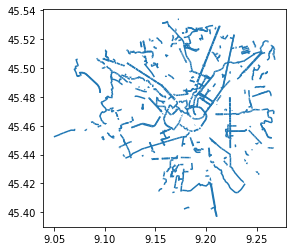

In [5]:
bici.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [6]:
quartieri = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")

In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

In [7]:
quartieri_mercatore = quartieri.to_crs(3857)
bici_mercatore = bici.to_crs(3857)

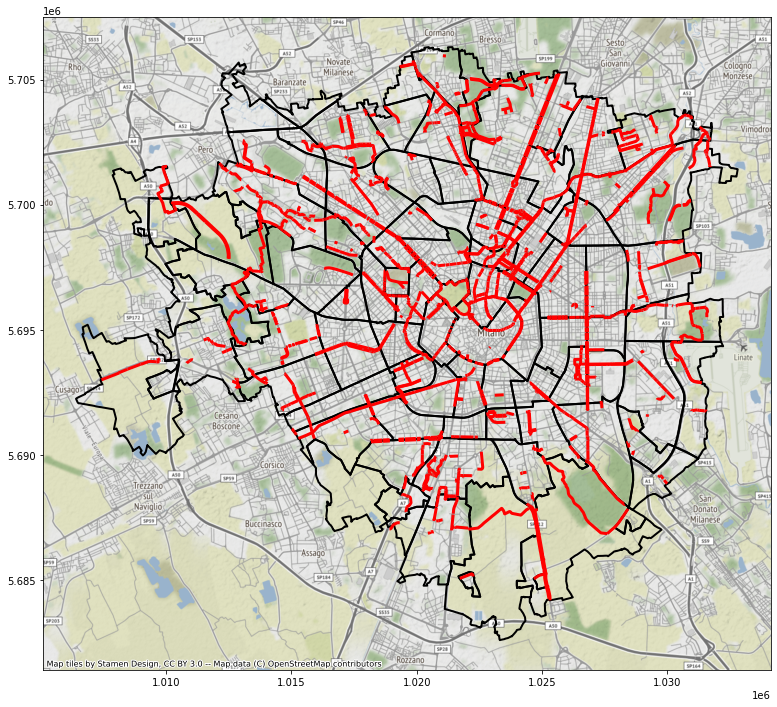

In [8]:
ax = quartieri_mercatore.plot(figsize = (15, 12), edgecolor = "k", facecolor = "none", linewidth = 2)
bici_mercatore.plot(ax = ax, edgecolor = "Red", linewidth = 3)
ctx.add_basemap(ax)

In [11]:
# trovare il quartiere meno esteso
quartiere_meno = quartieri_mercatore[quartieri_mercatore["Shape_Area"] == quartieri_mercatore["Shape_Area"].min()]
quartiere_meno

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,188863.446965,135,"POLYGON ((1022317.895 5684907.876, 1022405.255..."


In [12]:
# trovare il quartiere più esteso
quartiere_piu = quartieri_mercatore[quartieri_mercatore["Shape_Area"] == quartieri_mercatore["Shape_Area"].max()]
quartiere_piu

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
55,85,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144,"POLYGON ((1026043.685 5689768.453, 1026069.001..."


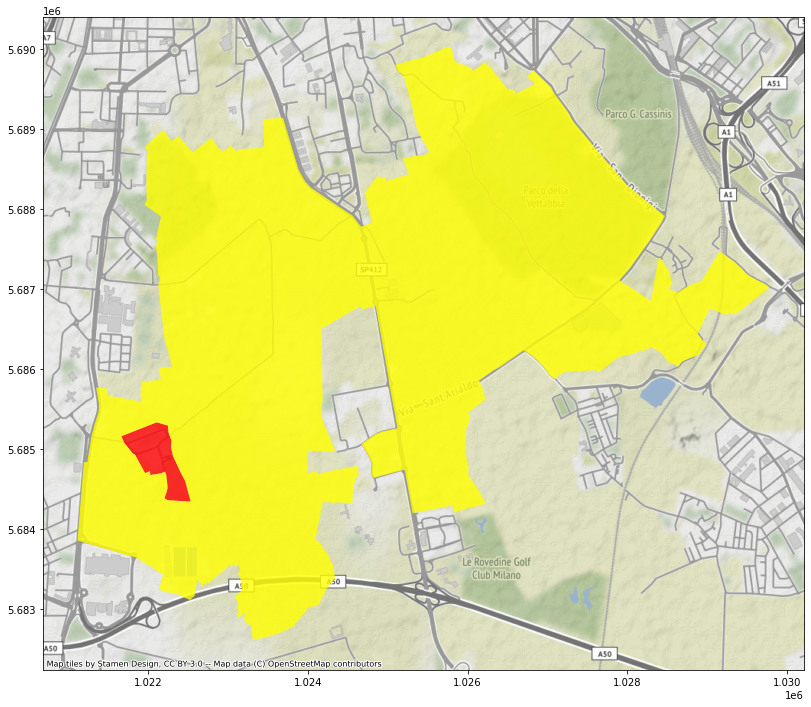

In [16]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto
ax = quartiere_meno.plot(figsize = (15, 12), facecolor = "Red", alpha = 0.8)
quartiere_piu.plot(ax = ax, facecolor = "Yellow", alpha = 0.8)
ctx.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [17]:
affori = quartieri_mercatore[quartieri_mercatore["NIL"].str.contains("AFFORI")]
affori

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((1021653.210 5703599.076, 1021685.942..."


In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

In [26]:
affori_oggetto = affori.geometry.item()
bici_affori = bici_mercatore[bici_mercatore.intersects(affori_oggetto)]
bici_affori

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
32,9039,1088,VIALE ENRICO FERMI,None,urbana,percorso promiscuo - attraversamento,attraversamento,bidirezionale,attraversamento - generico,36.0,"LINESTRING (1021818.103 5702817.130, 1021868.7..."
252,9299,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,172.0,"LINESTRING (1022245.849 5701530.613, 1022215.6..."
255,9302,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,211.0,"LINESTRING (1022108.972 5701729.869, 1022083.1..."
294,9342,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,455.0,"LINESTRING (1021963.252 5701985.708, 1021960.3..."
668,9716,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,33.0,"LINESTRING (1021829.043 5702622.250, 1021783.4..."
...,...,...,...,...,...,...,...,...,...,...,...
2982,12754,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,8.0,"LINESTRING (1021580.067 5702008.160, 1021585.2..."
2983,12755,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,46.0,"LINESTRING (1021551.115 5702067.311, 1021580.0..."
2984,12756,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,20.0,"LINESTRING (1021538.926 5702092.978, 1021551.1..."
2985,12757,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,40.0,"LINESTRING (1021513.304 5702144.847, 1021538.9..."


In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

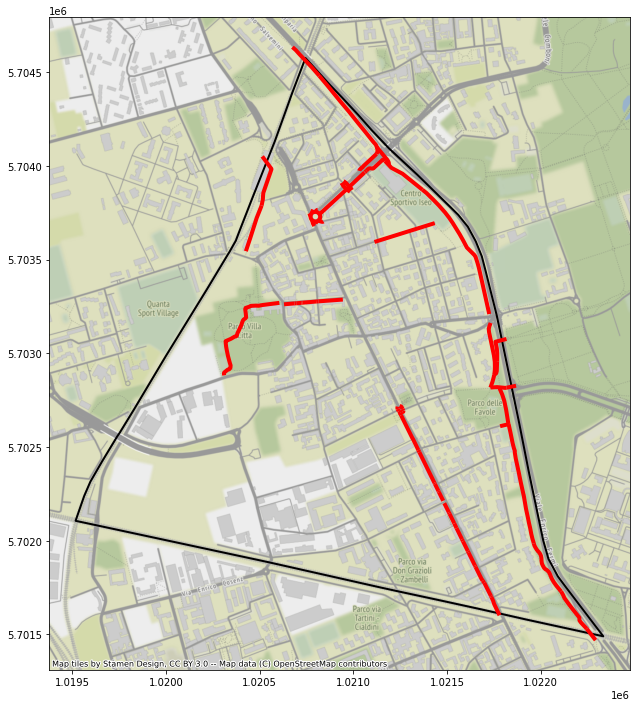

In [27]:
ax = affori.plot(figsize = (15, 12), edgecolor = "k", facecolor = "none", linewidth = 2)
bici_affori.plot(ax = ax, edgecolor = "Red", linewidth = 4)
ctx.add_basemap(ax)